# można używać tylko tych bibliotek, które są załadowane, reszta z palca ma być pisana 

# Projekt Indywidualny 2022/2023
Zadaniem tego projektu jest potwierdzenie posiadania przez Państwa umiejętności budowania modelu regresji na przykładzie danych zawierających ceny nieruchomości znajdujących się w pliku "domy.csv". W zadaniu należy wykorzystać wiedzę poznaną na laboratorium i wykładzie w tym metody regularyzacji, metody wyboru i tworzenia nowych zmiennych, określenie jakości modelu, metody optymalizacji.

Za projekt można zdobyć 50 pkt. Za każde zadanie można dostać od 0 do 5 pkt. Każde zadanie musi być opisane stosownymi komentarzami i podsumowane wnioskami wynikającymi z wykonanych obliczeń.

**!!! Do wykonania projektu nie możemy korzystać z żadnych dodatkowych pakietów niż poniższe 5 !!!**

Czas na wykonanie projektu - 31.12.2022 r.

jakie matematyczne można           byle optymalizatory były własnoręcznie

In [284]:
# Wyczanie pakietów podstawowych
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [285]:
import re

In [286]:
# Wczytanie danych
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


### Podział danych zostanie dokonany zależnie od numeru indeksu

In [287]:
# !!!Jako random_state podaj swój numer indeksu!!!
numer_indeksu = 324244
ceny = domy['price']
domy.drop('price', axis=1, inplace=True)
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
cechy = domy.columns.values
cechy

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

## Zadanie 1
Dokonaj analizy posiadanych zmiennych. Zakresy zmienności, korelacje, skośność. Dane nieużyteczne jak np. id można pominąć.

## pierwsze rozglądanie się po danych

In [288]:
domy.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3.0,1.00,1180.0,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,3.0,2.25,2570.0,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,2.0,1.00,770.0,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,4.0,3.00,1960.0,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,3.0,2.00,1680.0,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [289]:
domy.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [290]:
domy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  object 
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  float64
 5   sqft_lot       21613 non-null  int32  
 6   floors         21613 non-null  object 
 7   waterfront     21613 non-null  int32  
 8   view           21613 non-null  int32  
 9   condition      21613 non-null  int32  
 10  grade          21613 non-null  int32  
 11  sqft_above     21613 non-null  int32  
 12  sqft_basement  21613 non-null  int32  
 13  yr_built       21613 non-null  int32  
 14  yr_renovated   21613 non-null  int32  
 15  zipcode        21613 non-null  object 
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## dane domy zawierają:
* 19 kolumn/cech
* próbe o wielkości 21613 jednostek
* nie posiadają wartości pustych
* typy danych to 16 numerycznych (float i int) oraz 3 tekstowe (string)
* dane ilościowe
* * ciągłe to sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15, lat, long
* * dyskretne to date, yr_built, bedrooms, bathrooms, floors 
* dane jakościowe to waterfront, view, condition, grade, yr_renovated, zipcode 

## korelacje

Miara korelacji pozwala na stwierdzenie stopnia zależności liniowej między danymi.

domy to DataFrame, użycie pandas-owej funkcji corr() oblicza miarę korelacji Pearsona

<AxesSubplot:>

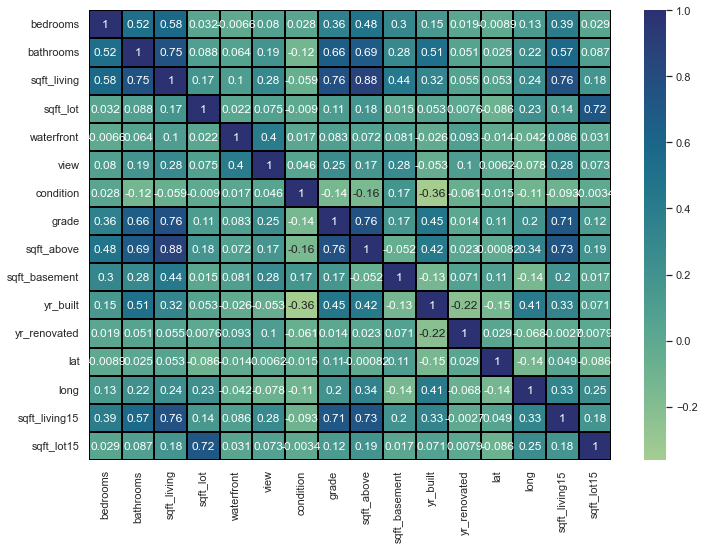

In [291]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(domy.corr(),annot = domy.corr(), cmap="crest", linewidths=2, linecolor='black')

## zakres zmienności oraz skośność 

In [292]:
domy_std = domy.std()
domy_mean = domy.mean()
domy_mode = domy.mode()
domy_median = domy.median()

C:\Users\krukd\AppData\Local\Temp/ipykernel_21360/944254747.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  domy_std = domy.std()
C:\Users\krukd\AppData\Local\Temp/ipykernel_21360/944254747.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  domy_mean = domy.mean()
C:\Users\krukd\AppData\Local\Temp/ipykernel_21360/944254747.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  domy_median = domy.median()


    dominanta - moda dla lat ma 4 wartości 

In [293]:
domy_mode

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0795000620,20140623T000000,3.0,2.5,1300.0,5000.0,1,0.0,0.0,3.0,7.0,1300.0,0.0,2014.0,0.0,98103,47.5322,-122.29,1540.0,5000.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.5491,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6624,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6846,NaN,NaN,NaN


In [294]:
domy_mean

id                        inf
bedrooms         3.370842e+00
bathrooms        2.114757e+00
sqft_living      2.079900e+03
sqft_lot         1.510697e+04
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode                   inf
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
dtype: float64

In [295]:
domy_std

bedrooms             0.930062
bathrooms            0.770163
sqft_living        918.440897
sqft_lot         41420.511515
waterfront           0.086517
view                 0.766318
condition            0.650743
grade                1.175459
sqft_above         828.090978
sqft_basement      442.575043
yr_built            29.373411
yr_renovated       401.679240
lat                  0.138564
long                 0.140828
sqft_living15      685.391304
sqft_lot15       27304.179631
dtype: float64

In [296]:
V = domy_std / domy_mean
V

bathrooms         0.364185
bedrooms          0.275914
condition         0.190866
grade             0.153517
id                     NaN
lat               0.002913
long             -0.001152
sqft_above        0.463037
sqft_basement     1.518221
sqft_living       0.441579
sqft_living15     0.345015
sqft_lot          2.741815
sqft_lot15        2.138409
view              3.270620
waterfront       11.471756
yr_built          0.014903
yr_renovated      4.759105
zipcode                NaN
dtype: float64

In [297]:
A_m = (3 * (domy_mean - domy_median)) / domy_std
A_m

bathrooms       -0.526808
bedrooms         1.196184
condition        1.887517
floors                NaN
grade            1.676468
id                    NaN
lat             -0.254341
long             0.343047
sqft_above       0.827412
sqft_basement    1.975997
sqft_living      0.554961
sqft_living15    0.641469
sqft_lot         0.542410
sqft_lot15       0.565678
view             0.917257
waterfront       0.261512
yr_built        -0.408008
yr_renovated     0.630371
zipcode               NaN
dtype: float64

In [298]:
# sns.set(rc={'figure.figsize':(12,9)})
# col_iter = 0
# for col in domy.columns:
#     if col != "id" and col != "date" and col != "zipcode":
#         sns.histplot(domy[col])
#         plt.show()
#     col_iter += 1

eliminuje wszystko poza int/float, ponieważ chce wykonać numeryczne modyfikacje

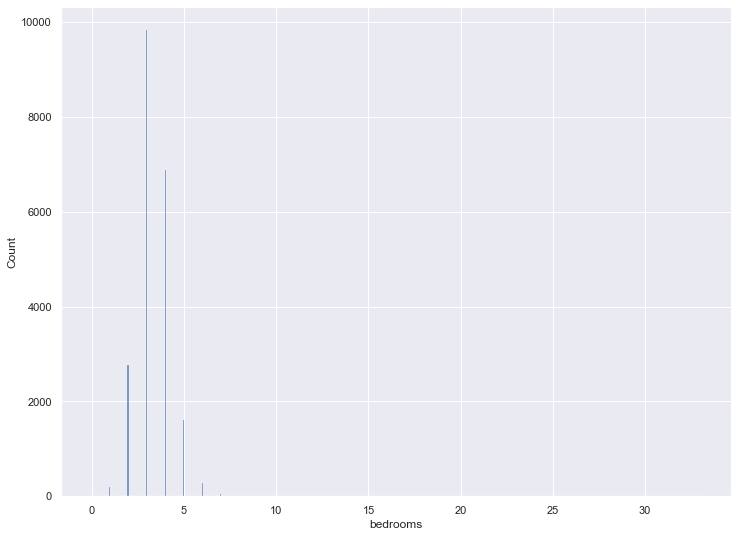

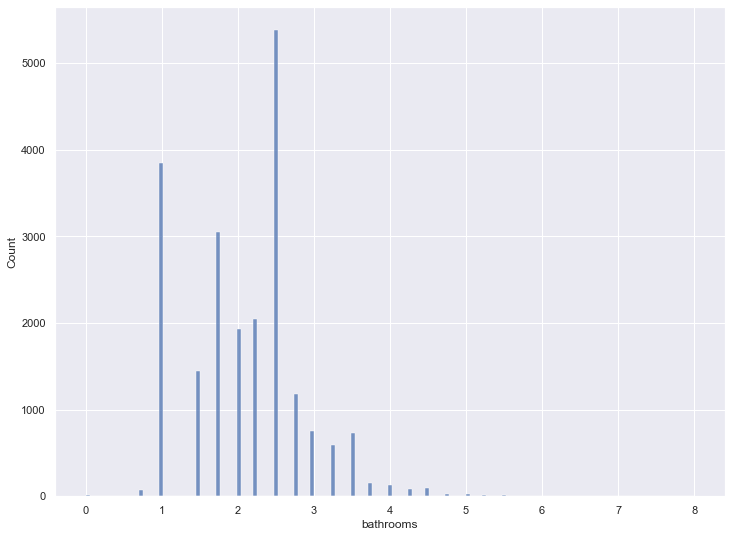

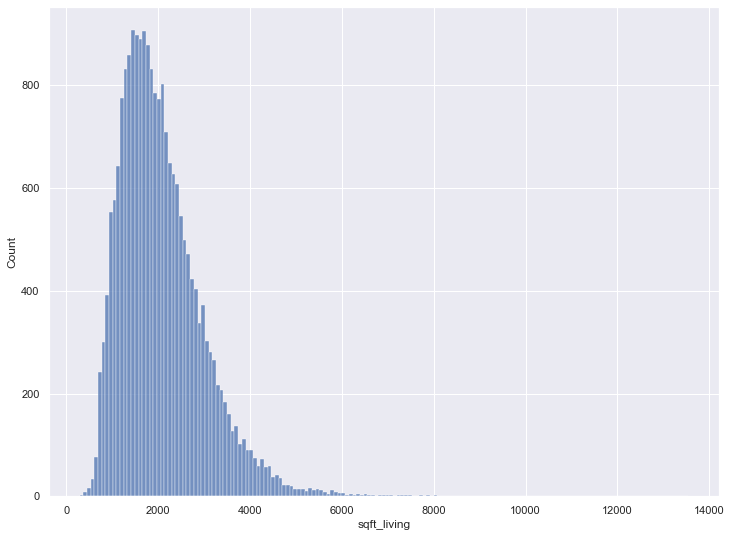

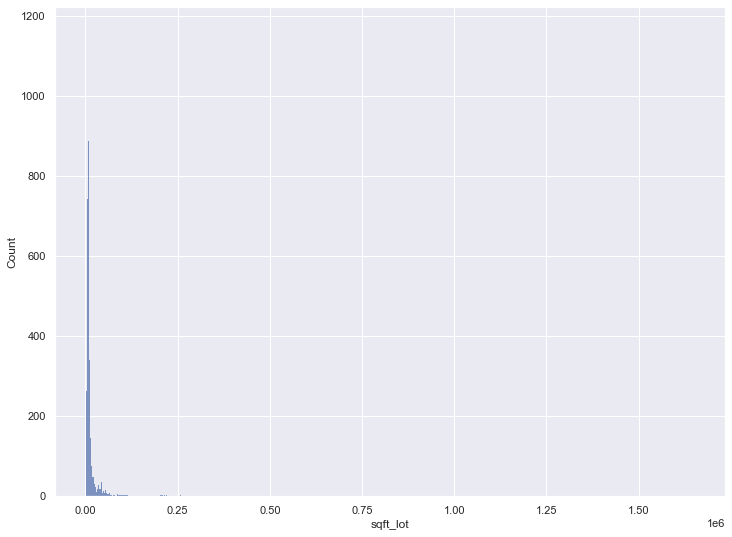

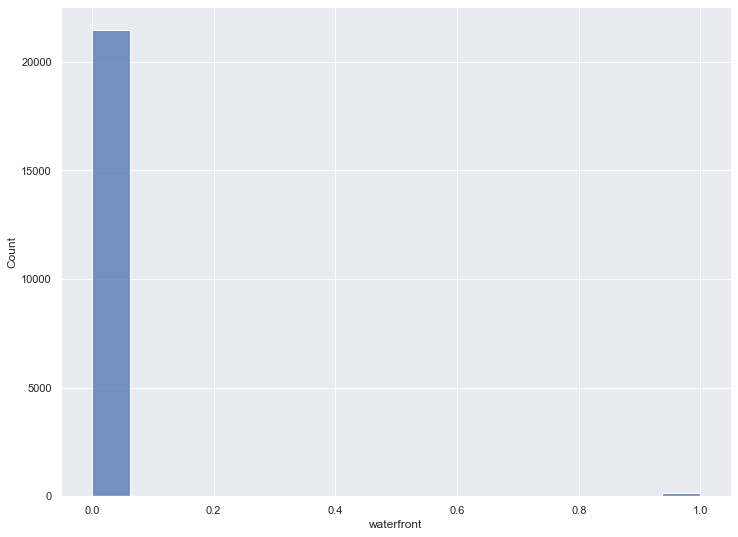

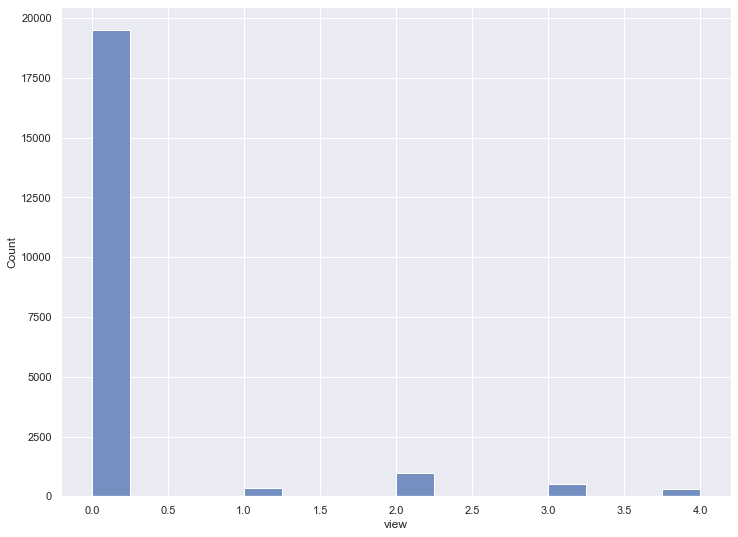

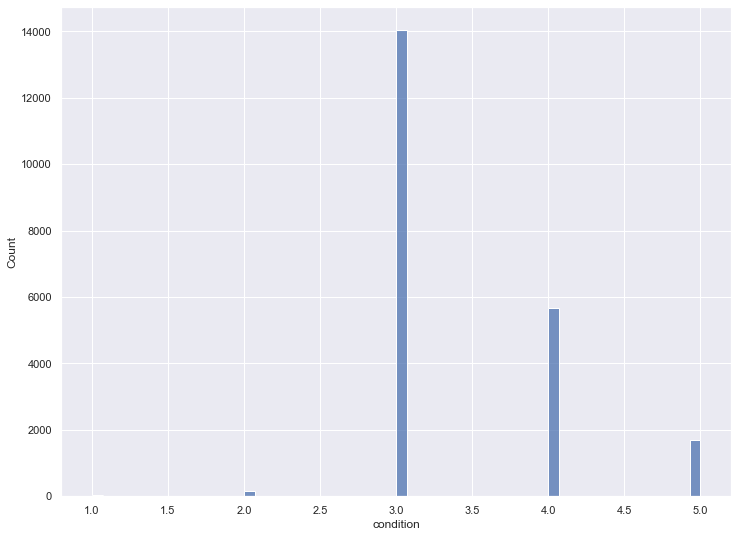

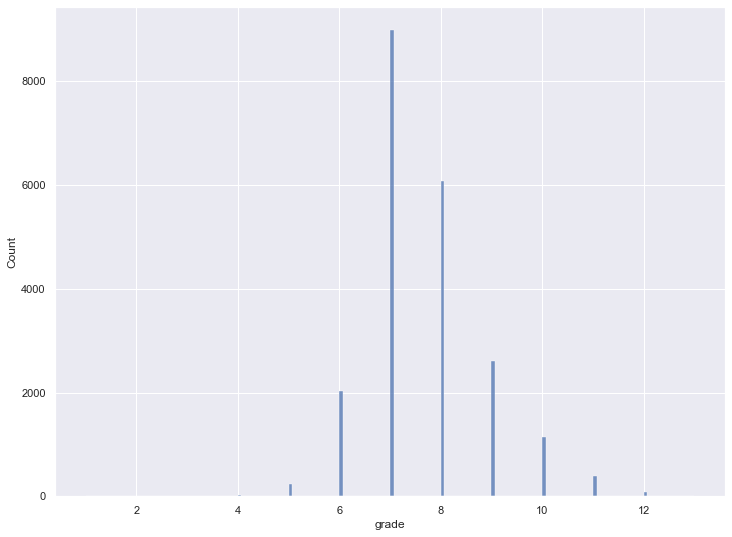

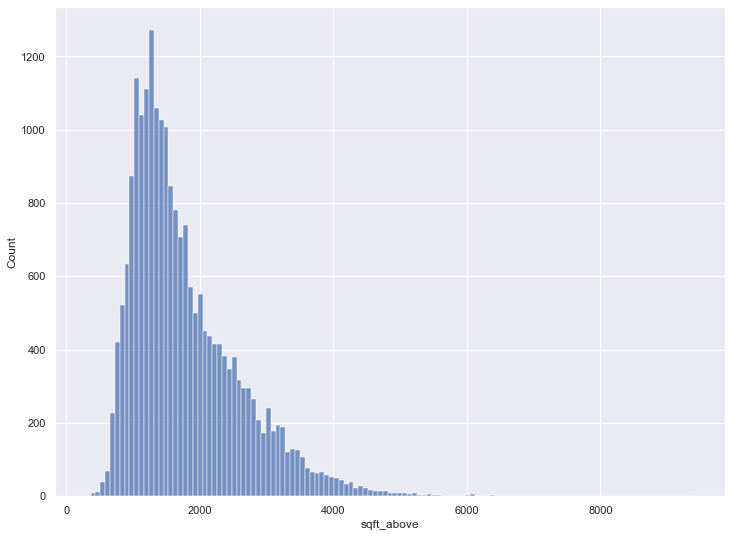

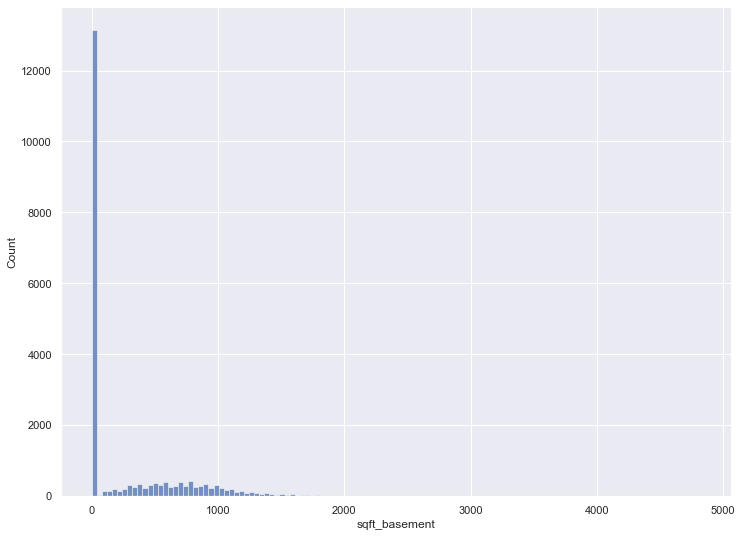

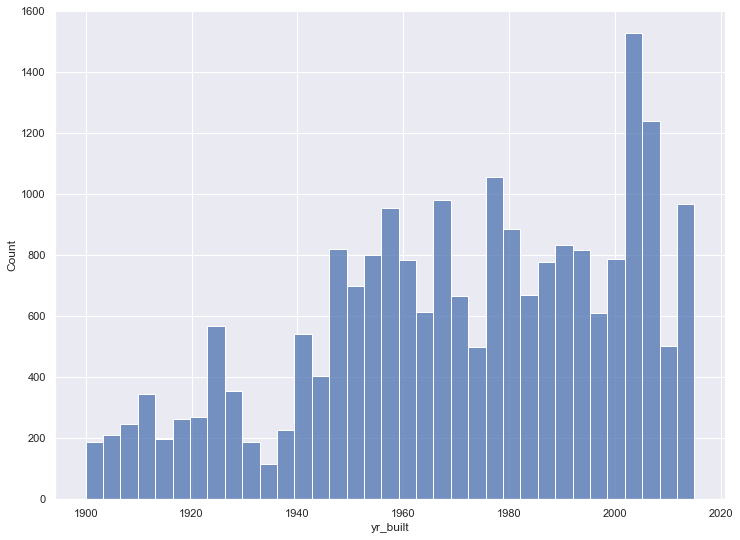

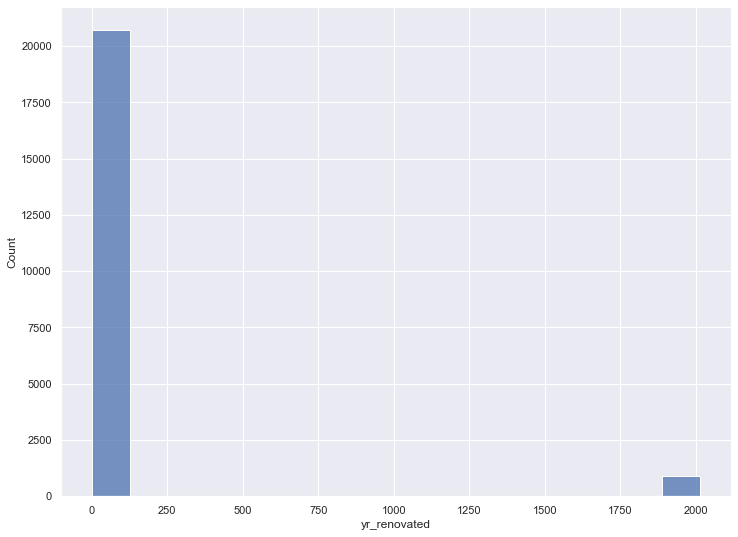

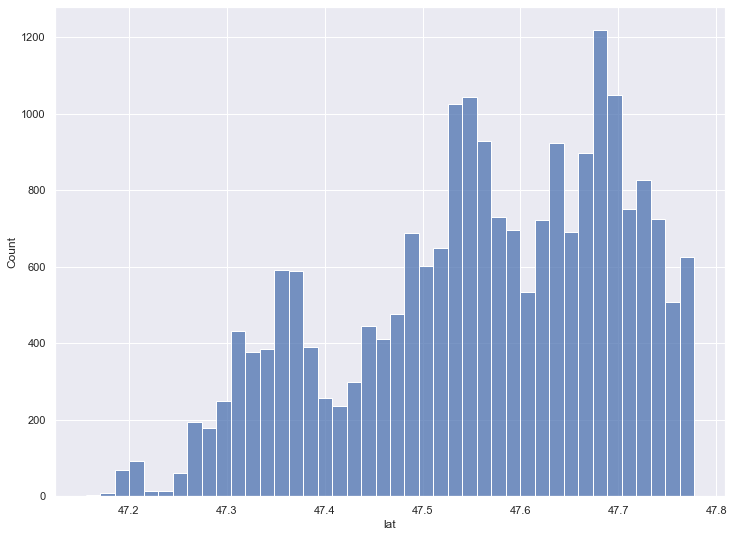

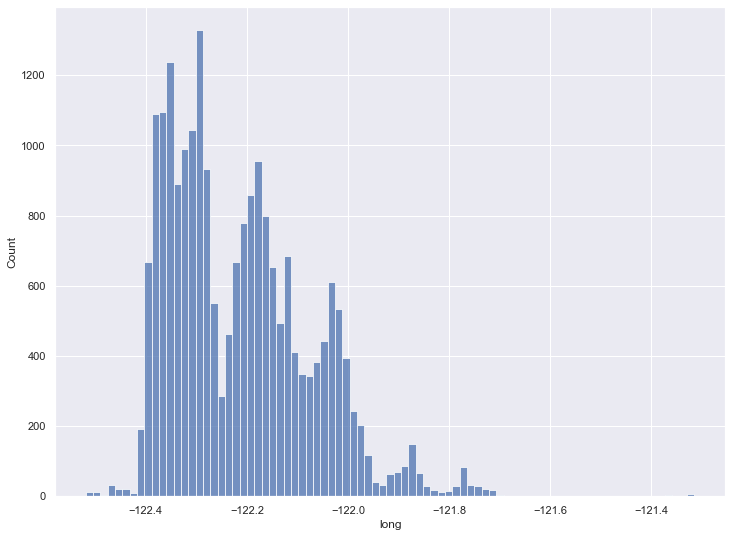

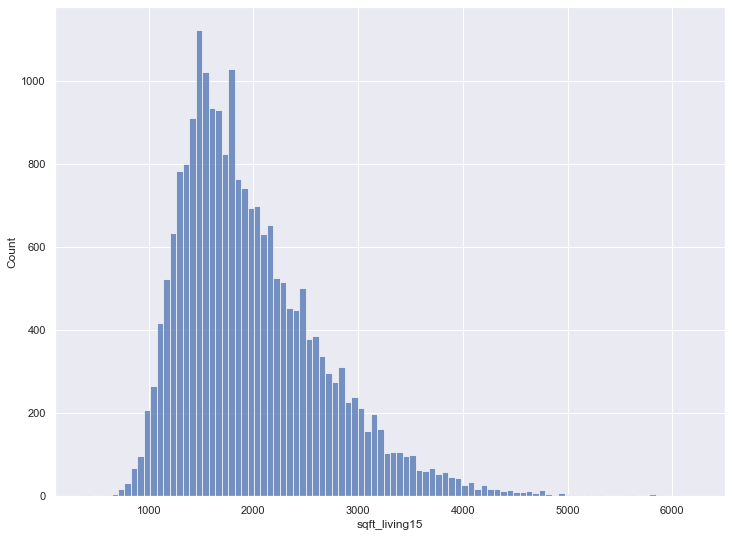

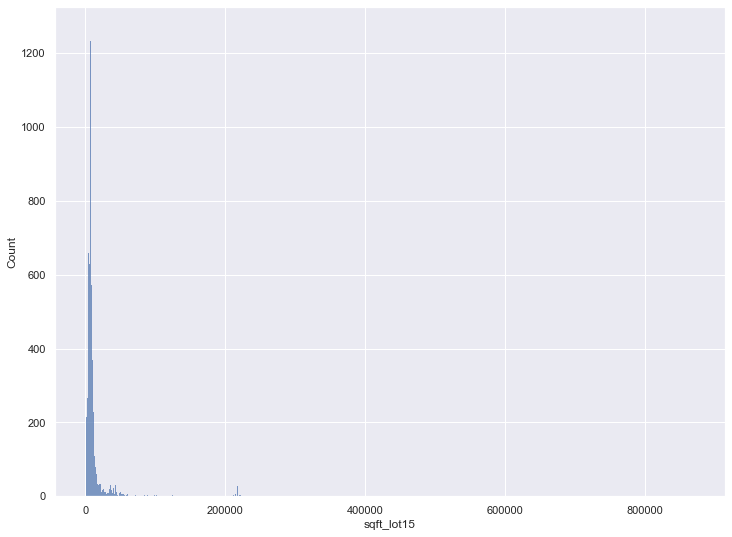

In [299]:
sns.set(rc={'figure.figsize':(12,9)})
col_iter = 0
for col in domy.columns:
    if re.match('^float', str(domy.dtypes[col])) or re.match('^int', str(domy.dtypes[col])):
        sns.histplot(domy[col])
        plt.show()
    col_iter += 1

    lepiej obrazuje ten pudełkowy, ładnie widać jak niektóre te wartości odstające wpływają na reszte

Wykres pudełkowy , zwykle używany do obserwacji, różnic pomiędzy kategoriami, tutaj używam go do wizualizacji danych odstających (outliers).Pudełko pokazuje kwartyle zbioru danych, podczas gdy wąsy rozciągają się, aby pokazać resztę rozkładu, z wyjątkiem punktów, które są określone jako odstające za pomocą funkcją zakresu międzykwartylowego IR (Q1, a Q3). W seaborn-owej funkcji bosplot jest zmienne whis, w której można zmienić zakres wąsów, przez Q1/Q3 -/+ x*IR.

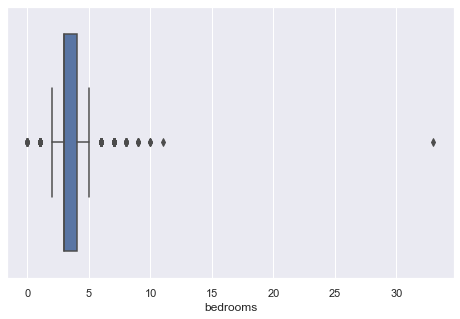

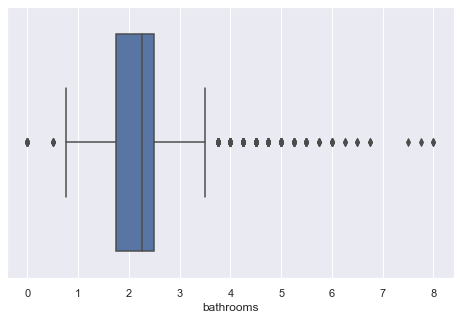

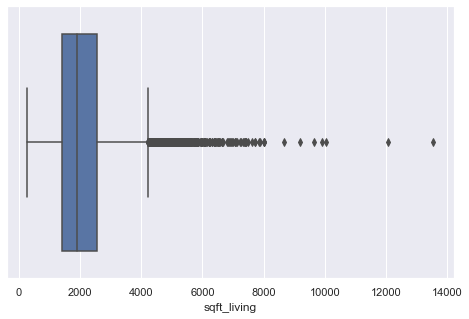

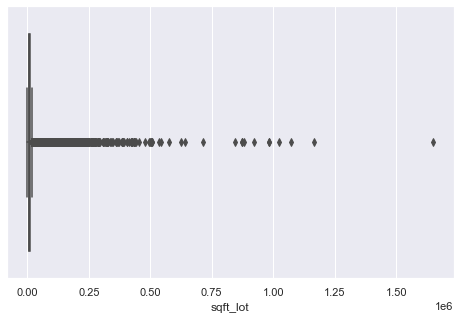

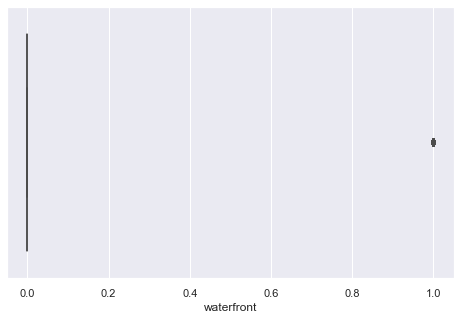

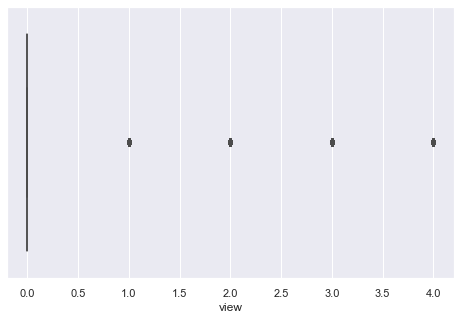

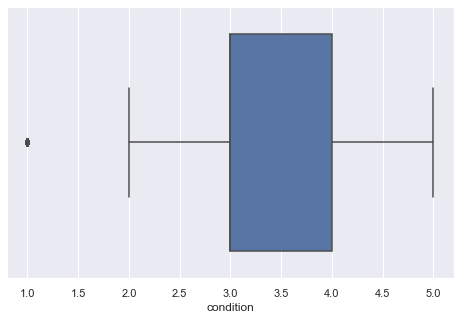

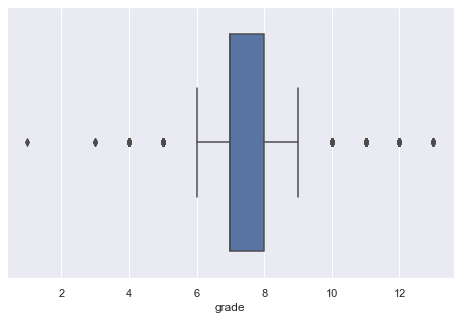

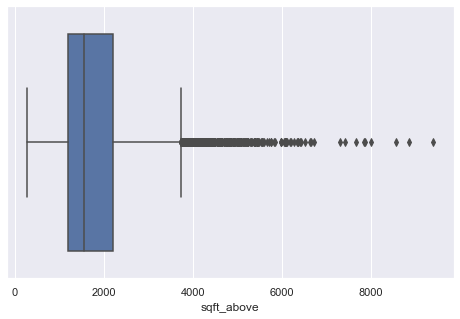

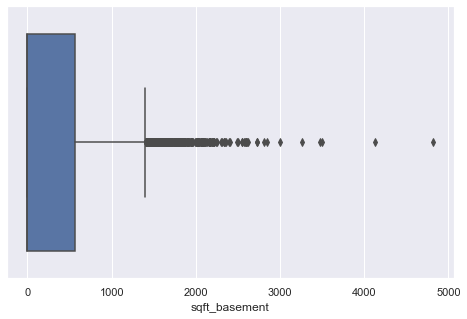

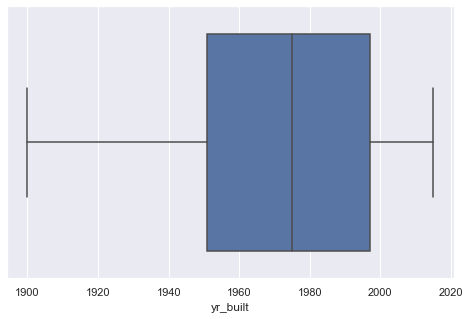

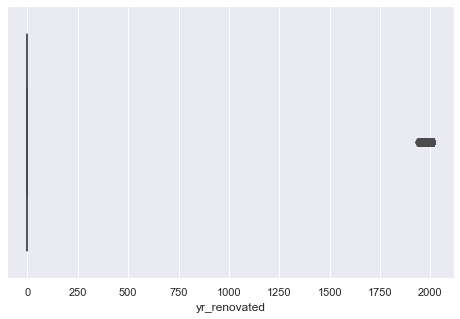

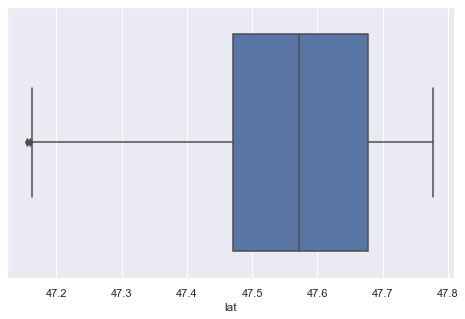

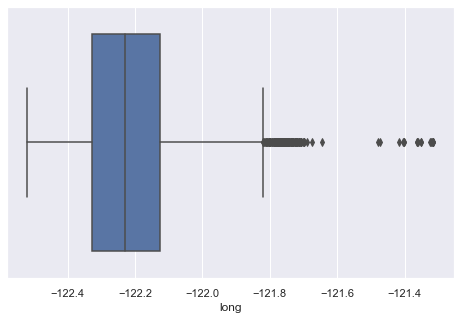

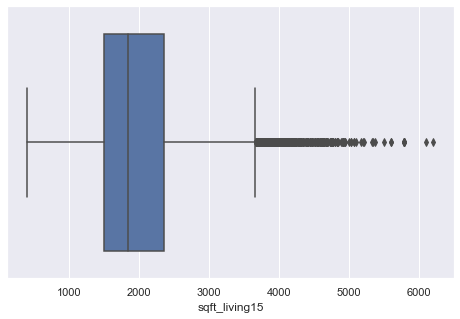

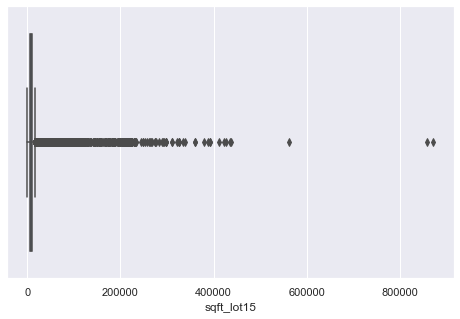

In [300]:
sns.set(rc={'figure.figsize':(8,5)})
for col in domy.columns:
    if re.match('^float', str(domy.dtypes[col])) or re.match('^int', str(domy.dtypes[col])):
        sns.boxplot(x = domy[col], whis =1.5)
        plt.show()

## Zadanie 2
Zaproponuj 5 nowych cech będących wynikiem przeprowadzonych w ramach Zadaniu 1 analiz lub doświadczeń.

* sqft_living prawostronny -> dać log |
* sqrf_lot też prawostronny? |
	na pewno można lepiej splotować |
* waterfront 0/1? jak tak, to coś z tym robić? |
* sqft_above (Above Grade Square Feet is the term referring to all living square feet in a home that is above the ground) prawostronny -> dać log |
* sqft_basement ma 0, może to jakoś podzielić na sqft_basement > 0 i te reszta? |
* to samo z yr_renovated |
* long prawostronny? |
* sqft_living15 prawostronny? czy on się czymś różni od po prostu sqft_living? |
* to samo z sqft_lot15

In [301]:
#domy['sqft_living_LOG'] = domy.apply(lambda row: domy['sqft_living'], axis=1)

In [302]:
domy_0 = domy.copy()

In [303]:
nowe_cech = domy.copy()

In [304]:
domy['sqft_living_LOG'] = np.log(domy['sqft_living'])
try:
    nowe_cech = nowe_cech.drop('sqft_living', axis=1)
except KeyError:
    pass
nowe_cech['sqft_living_LOG'] = domy['sqft_living_LOG']

In [305]:
domy['sqft_lot_LOG'] = np.log(domy['sqft_lot'])
try:
    nowe_cech = nowe_cech.drop('sqft_lot', axis=1)
except KeyError:
    pass
nowe_cech['sqft_lot_LOG'] = domy['sqft_lot_LOG']

In [306]:
# floors to string

In [307]:
domy['sqft_above_LOG'] = np.log(domy['sqft_above'])
try:
    nowe_cech = nowe_cech.drop('sqft_above', axis=1)
except KeyError:
    pass
nowe_cech['sqft_above_LOG'] = domy['sqft_above_LOG']

In [308]:
domy['bed_bath_rooms'] = domy['bedrooms']*domy['bathrooms']
try:
    nowe_cech = nowe_cech.drop('bedrooms', axis=1)
    nowe_cech = nowe_cech.drop('bathrooms', axis=1)
except KeyError:
    pass
nowe_cech['bed_bath_rooms'] = domy['bed_bath_rooms']

* waterfront 0/1? jak tak, to coś z tym robić? |
* sqft_basement ma 0, może to jakoś podzielić na sqft_basement > 0 i te reszta? |
* to samo z yr_renovated |
* long prawostronny? |
* sqft_living15 prawostronny? czy on się czymś różni od po prostu sqft_living? |
* to samo z sqft_lot15

# co z "id", "date", "zipcode"?

## Zadanie 3
Dokonaj wizualiazji nowych cech i określ ich korelację.

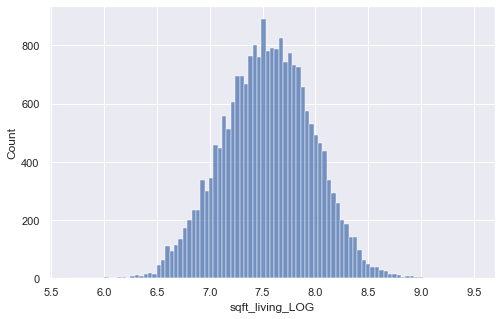

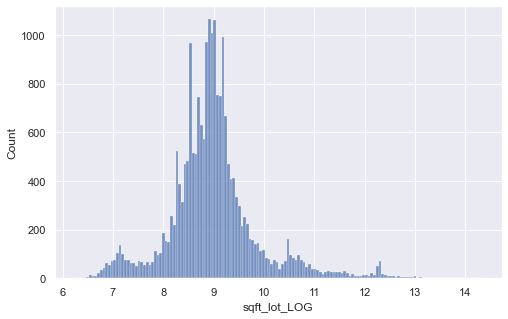

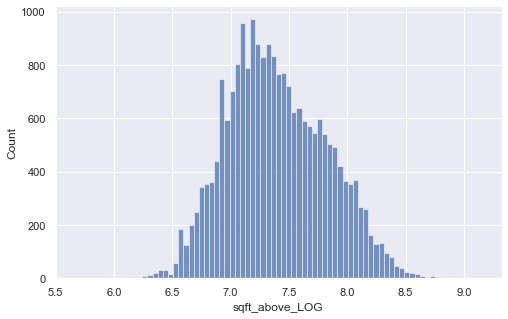

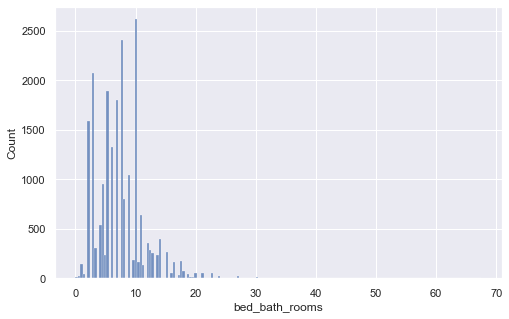

In [309]:
sns.set(rc={'figure.figsize':(8,5)})
for i, col in enumerate(domy.columns):
    if (re.match('^float', str(domy.dtypes[col])) or re.match('^int', str(domy.dtypes[col]))) and i >= col_iter:
        sns.histplot(domy[col])
        plt.show()

* sqft_lot wychodzi NIE unimodalnie
* sqft_living 👍
* sqft_above 👍
* dodanie interakcji pomiedzy bedrooms, bathrooms - przez pomnożenie tych wartości

<AxesSubplot:>

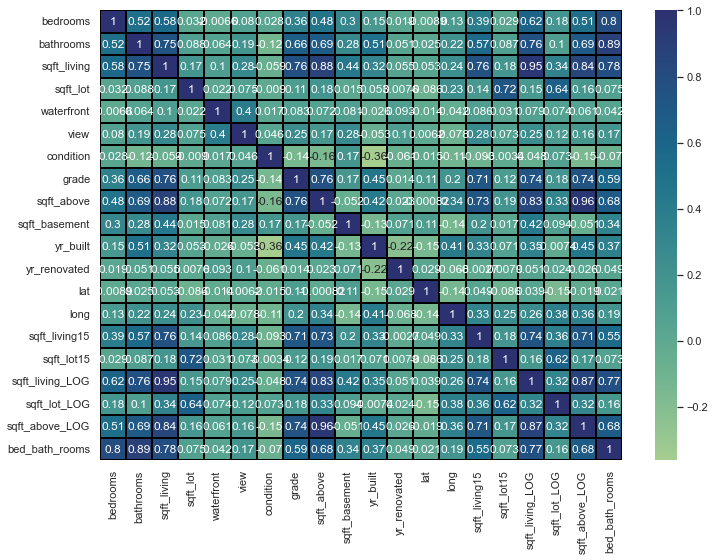

In [310]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(domy.corr(),annot = domy.corr(), cmap="crest", linewidths=2, linecolor='black')

<AxesSubplot:>

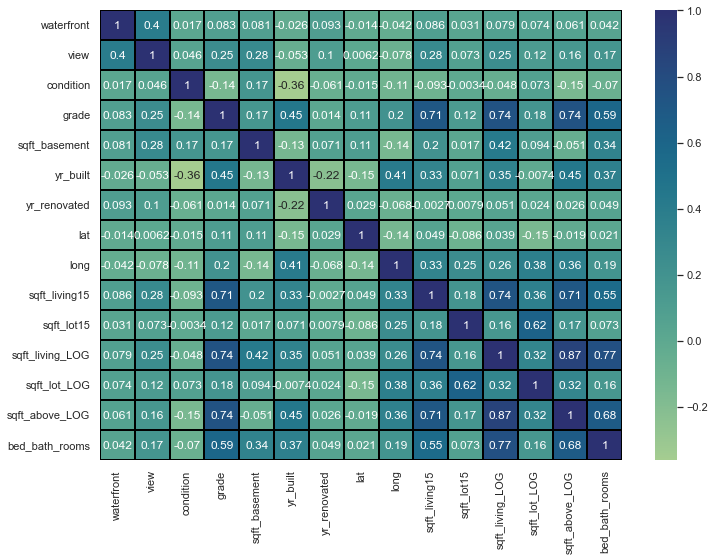

In [311]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(nowe_cech.corr(),annot = nowe_cech.corr(), cmap="crest", linewidths=2, linecolor='black')

## Zadanie 4

Wyznacz liniową zależność między 3 najbardziej skorelowanymi ze zmienną opisywaną zmiennymi opisującymi (wszystkie podane cechy + 5 nowo utworzonych). Do wyznaczenia liniowej zależności między cechami, a zmienną opisywaną wykorzystaj pseudoinwersję.

In [341]:
to_price_corr = domy.copy()
to_price_corr['price'] = ceny
to_price_corr.corr().loc['price'].sort_values(ascending=False)

price              1.000000
sqft_living        0.702035
grade              0.667434
sqft_living_LOG    0.611704
sqft_above         0.605567
sqft_living15      0.585379
sqft_above_LOG     0.542734
bathrooms          0.525138
bed_bath_rooms     0.516641
view               0.397293
sqft_basement      0.323816
bedrooms           0.308350
lat                0.307003
waterfront         0.266369
sqft_lot_LOG       0.161318
yr_renovated       0.126434
sqft_lot           0.089661
sqft_lot15         0.082447
yr_built           0.054012
condition          0.036362
long               0.021626
Name: price, dtype: float64

3 najbardziej skorelowane zmienne opisujące ze zmienną opisywaną (price) to sqft_living, grade, (nie liczę sqft_living_LOG), sqft_above. Do zbadanie zależności liniowej wykorzystałem pseudoodwrotność (numpy.linalg.pinv()) oraz mnożenie macierzy (funkcja dot). Po takiej operacji (funkcja model_train) otrzymuje współczynniki/wagi modelu. 

In [342]:
# Funkcja szukająca współczynników modelu
def model_train(X_train, Y_train):
    
    #Dołożenie wyrazu wolnego nie jest tutaj potrzebne, 
    #X = np.vstack([np.ones(len(X_train)), X_train.T]).T
    #???

    pinw = np.linalg.pinv(X_train)
    model = np.dot(pinw, Y_train)
    return model, pinw

In [343]:
coefs, pinw = model_train(domy_train[['sqft_living', 'grade', 'sqft_above']], ceny_train)
coefs, pinw.shape

(array([ 273.47805451, 3653.25045117,  -26.43444252]), (3, 14480))

In [344]:
def predict_output(data, w):
    #X = np.vstack([np.ones(len(data)), data.T]).T
    return np.dot(data, w)

In [345]:
ceny_train

15493     320000.0
10381     490000.0
7561      258900.0
17567     316000.0
9767      366000.0
           ...    
600       507000.0
16065     280000.0
5669     1157400.0
20102     594491.0
16821     610000.0
Name: price, Length: 14480, dtype: float64

In [346]:
ceny_pred = predict_output(domy_train[['sqft_living', 'grade', 'sqft_above']], coefs)
ceny_pred

array([650025.74483171, 476057.16764612, 380950.20925602, ...,
       713432.00137684, 771539.65392432, 755429.41541592])

In [347]:
def policz_SSE(model, data, outcome):
    # Wylicz przewidywaną wartość
    pred = predict_output(data, model)
    # Policz błąd bezwzglęny
    error = outcome - pred
    # Podnieś błędy do kwadratu i zsumuj je
    SSE = sum(np.square(error))
    return SSE, pred  

In [348]:
policz_SSE(coefs, domy_train[['sqft_living', 'grade', 'sqft_above']], ceny_train)

(996789752223620.4,
 array([650025.74483171, 476057.16764612, 380950.20925602, ...,
        713432.00137684, 771539.65392432, 755429.41541592]))

In [349]:
def tester(X_train, y_train, X_test, y_test, model_features):
    coefs, pinw = model_train(X_train[model_features], y_train)
    train_error, train_pred = policz_SSE(coefs, X_train[model_features], y_train)
    test_error, test_pred = policz_SSE(coefs, X_test[model_features], y_test)
    return coefs, pinw, train_pred, test_pred, train_error, test_error

In [350]:
numer_indeksu = 324244
nowe_cech_train, nowe_cech_test, nowe_cech_ceny_train, nowe_cech_ceny_test = train_test_split(nowe_cech, ceny, test_size=0.33, random_state=numer_indeksu)

In [351]:
numer_indeksu = 324244
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)

In [352]:
top3_most_correlated_with_price = ['sqft_living', 'grade', 'sqft_above']

In [353]:
domy_train[['sqft_living', 'grade', 'sqft_above']].head()

,sqft_living,grade,sqft_above
15493,2410.0,7,1310
10381,1770.0,7,1270
7561,1400.0,7,1040
17567,1900.0,7,1900
9767,1510.0,7,1510


In [354]:
coefs, X_p, train_pred, test_pred, train_error, test_error = tester(domy_train, ceny_train, domy_test, ceny_test, top3_most_correlated_with_price)

In [355]:
coefs

array([ 273.47805451, 3653.25045117,  -26.43444252])

współczynnik sqft_living-a ma znak dodatni czyli wzrost wartości tej cechy będzie oznaczał wzrost wartości przewidywanej, tak samo z grade. sqft_above natomiast ma znak ujemny czyli spadek wartości tej cechy będzie oznaczał spadek wartości przewidywanej.
sama bezwględna wartość wspłóczynnika wpłwa na to jak dużą rolę ma dana cecha w kontekście wartości przewidywanej 

    poniższa część reprezentuje moje zmagania z próbą zrozumienia znaczenia wyznaczania liniowych zależności oraz wpływie normalizacji danych na to co wskazują

In [356]:
nowe_cech_model_features = ['sqft_living_LOG', 'sqft_lot_LOG',
       'sqft_above_LOG'
       #, 'bed_bath_rooms'
       ]

In [357]:
nowe_cech_model_features_bbr = ['sqft_living_LOG', 'sqft_lot_LOG',
       'sqft_above_LOG'
       , 'bed_bath_rooms'
       ]

In [358]:
coefs, X_p, train_pred, test_pred, train_error, test_error = tester(nowe_cech_train, nowe_cech_ceny_train, nowe_cech_test, nowe_cech_ceny_test, nowe_cech_model_features)
coefs_bbr, X_p, train_pred, test_pred, train_error, test_error = tester(nowe_cech_train, nowe_cech_ceny_train, nowe_cech_test, nowe_cech_ceny_test, nowe_cech_model_features_bbr)

In [359]:
domy_train[nowe_cech_model_features].head(), domy_train[nowe_cech_model_features_bbr].head()

(       sqft_living_LOG  sqft_lot_LOG  sqft_above_LOG
 15493         7.787382      9.283870        7.177782
 10381         7.478735      8.923724        7.146772
 7561          7.244228      9.253017        6.946976
 17567         7.549609      8.919854        7.549609
 9767          7.319865      9.024131        7.319865,
        sqft_living_LOG  sqft_lot_LOG  sqft_above_LOG  bed_bath_rooms
 15493         7.787382      9.283870        7.177782           16.50
 10381         7.478735      8.923724        7.146772            5.25
 7561          7.244228      9.253017        6.946976            6.75
 17567         7.549609      8.919854        7.549609            6.75
 9767          7.319865      9.024131        7.319865            5.25)

In [360]:
domy_train[nowe_cech_model_features].mean(), domy_train[nowe_cech_model_features_bbr].mean()

(sqft_living_LOG    7.547283
 sqft_lot_LOG       8.981446
 sqft_above_LOG     7.391952
 dtype: float64,
 sqft_living_LOG    7.547283
 sqft_lot_LOG       8.981446
 sqft_above_LOG     7.391952
 bed_bath_rooms     7.511395
 dtype: float64)

In [361]:
np.round_(coefs, decimals = 2), np.round_(coefs_bbr, decimals = 2)

(array([ 260321.57,  -67484.16, -109641.34]),
 array([105039.95, -21561.01, -47080.47,  38818.28]))

In [362]:
domy_model_features = ['sqft_living', 'sqft_lot',
        'sqft_above'
        #, 'bedrooms', 'bathrooms'
        ]

In [363]:
domy_model_features_bbr = ['sqft_living', 'sqft_lot',
        'sqft_above'
        , 'bedrooms', 'bathrooms'
        ]

In [364]:
coefs, X_p, train_pred, test_pred, train_error, test_error = tester(domy_train, ceny_train, domy_test, ceny_test, domy_model_features)
coefs_bbr, X_p, train_pred, test_pred, train_error, test_error = tester(domy_train, ceny_train, domy_test, ceny_test, domy_model_features_bbr)

In [365]:
np.set_printoptions(suppress=True)

In [366]:
domy_train[domy_model_features].head(), domy_train[domy_model_features_bbr].head() 

(       sqft_living  sqft_lot  sqft_above
 15493       2410.0     10763        1310
 10381       1770.0      7508        1270
 7561        1400.0     10436        1040
 17567       1900.0      7479        1900
 9767        1510.0      8301        1510,
        sqft_living  sqft_lot  sqft_above  bedrooms  bathrooms
 15493       2410.0     10763        1310       6.0       2.75
 10381       1770.0      7508        1270       3.0       1.75
 7561        1400.0     10436        1040       3.0       2.25
 17567       1900.0      7479        1900       3.0       2.25
 9767        1510.0      8301        1510       3.0       1.75)

In [367]:
domy_train[domy_model_features].mean(), domy_train[domy_model_features_bbr].mean()

(sqft_living     2075.407597
 sqft_lot       14874.165470
 sqft_above      1783.436326
 dtype: float64,
 sqft_living     2075.407597
 sqft_lot       14874.165470
 sqft_above      1783.436326
 bedrooms           3.371823
 bathrooms          2.116471
 dtype: float64)

In [368]:
np.round_(coefs, decimals = 2), np.round_(coefs_bbr, decimals = 2)

(array([281.8 ,  -0.32, -19.62]),
 array([   319.06,     -0.36,    -15.83, -42264.25,  22266.39]))

## Zadanie 5
Napisz metodę regresji krokowej w tył i za jej pomocą wybierz 5 najbardziej wartościowych cech.

    estymator ma być zgodny?, nieobciążony (czyli idealnie dopasowany do danych uczących), najbardziej efektywny (najbardziej skuteczny na danych testowych czy walidacyjnych(jeżeli je stosujemy)). Bias-variance tradeoff pokazuje, że nie da się połączyć braku obciążenie i maksymalnej efektywności. Modele mają sprawdzać się w rzeczywistości, która często (pomimo analizy danych i odpowiedniego ich dobrania) jest inna niż dane jakie posiadamy. Dlatego poświęcamy brak obciążenia na rzecz efektywności, aby zbliżyć się do rzeczywistości. 

    Chcemy, aby model w swojej konstrukcji był prosty (realizowanie jak najmniejszego obciążenia przez upraszczanie modelu). 

In [392]:
nowe_cech_keys = list(nowe_cech_train.keys())
nowe_cech_numeric_keys = [i for i in nowe_cech_keys if re.match('^float', str(nowe_cech_train.dtypes[i])) or re.match('^int', str(nowe_cech_train.dtypes[i]))]  
worst_v = []
for i in range(len(nowe_cech_numeric_keys)):
    #coefs, X_p, train_pred, test_pred, train_error, test_error = tester(nowe_cech_train, nowe_cech_ceny_train, nowe_cech_test, nowe_cech_ceny_test, nowe_cech_numeric_keys)
    test_errors = []
    for inx, cecha in enumerate(nowe_cech_numeric_keys):
        test_cech = nowe_cech_numeric_keys.copy()
        del test_cech[inx]
        coefs, X_p, train_pred, test_pred, train_error, test_error = tester(nowe_cech_train, nowe_cech_ceny_train, nowe_cech_test, nowe_cech_ceny_test, test_cech)
        #train/test?    bez podziału na zbiory?
        test_errors.append(test_error)
    
    max_v = np.argmax(test_errors)
    worst_v.append(nowe_cech_numeric_keys[max_v])
    #print(nowe_cech_numeric_keys[max_v])
    nowe_cech_numeric_keys.pop(max_v)

In [406]:
worst_v

['grade',
 'lat',
 'sqft_living15',
 'sqft_above_LOG',
 'sqft_living_LOG',
 'bed_bath_rooms',
 'view',
 'sqft_basement',
 'waterfront',
 'yr_renovated',
 'sqft_lot_LOG',
 'sqft_lot15',
 'yr_built',
 'long',
 'condition']

In [394]:
best_5 = worst_v[-5:]
best_5 = list(reversed(best_5))
best_5

['condition', 'long', 'yr_built', 'sqft_lot15', 'sqft_lot_LOG']

    test czy liniowej zależności można dowiedzieć się, która cecha jest najbardziej wartościowa

In [397]:
nowe_cech_keys = list(nowe_cech_train.keys())
nowe_cech_numeric_keys = [i for i in nowe_cech_keys if re.match('^float', str(nowe_cech_train.dtypes[i])) or re.match('^int', str(nowe_cech_train.dtypes[i]))]  
nowe_cech_numeric_keys

['waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_living_LOG',
 'sqft_lot_LOG',
 'sqft_above_LOG',
 'bed_bath_rooms']

In [399]:
coefs, X_p, train_pred, test_pred, train_error, test_error = tester(nowe_cech_train, nowe_cech_ceny_train, nowe_cech_test, nowe_cech_ceny_test, nowe_cech_numeric_keys)

In [407]:
coefs

array([ 684503.74870265,   41343.98527338,   24345.36326933,
        140374.7476076 ,     337.00342597,   -3112.53789208,
            20.71274794,  482671.22718544,  145360.12903817,
            67.69336957,       0.26308761, -562368.85302403,
        -30634.13924961,  609786.69332779,   11282.53262098])

In [405]:
np.argmax(np.absolute(coefs))

0

## Zadanie 6
Dokonaj normalizacji cech (wszystkie podane + 5 zaproponowanych w Zadaniu 1) i przy pomocy metody Lasso lub LARS (metody mają zostać samodzielnie zaimplementowane) wybierz 5 najbardziej wartościowych cech.

**!!! Przy przekształceniach unikaj korzystania z informacji zawartej w zbiorze walidacyjnym i testowym !!!**

#### normalizacja żeby było łatwiej. implementowane było lasso i można jej użyć, można jak się chce LARS samemu zaimplementować. mamy 3 zbiory dlatego na uczenia

In [443]:
domy_int = domy.apply(pd.to_numeric, errors='coerce', downcast='integer')

In [444]:
domy_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21613 non-null  int64  
 1   date             0 non-null      float64
 2   bedrooms         21613 non-null  int8   
 3   bathrooms        21613 non-null  float64
 4   sqft_living      21613 non-null  int16  
 5   sqft_lot         21613 non-null  int32  
 6   floors           21613 non-null  float64
 7   waterfront       21613 non-null  int8   
 8   view             21613 non-null  int8   
 9   condition        21613 non-null  int8   
 10  grade            21613 non-null  int8   
 11  sqft_above       21613 non-null  int16  
 12  sqft_basement    21613 non-null  int16  
 13  yr_built         21613 non-null  int16  
 14  yr_renovated     21613 non-null  int16  
 15  zipcode          21613 non-null  int32  
 16  lat              21613 non-null  float64
 17  long        

In [445]:
domy_int.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)

In [455]:
domy_int_normalized = domy_int.copy()
for column in domy_int_normalized:
    domy_int_normalized[column] = (domy_int[column] - domy_int[column].min()) / (domy_int[column].max() - domy_int[column].min()) 
# domy_int_normalized

In [453]:
X_train, X_rem, y_train, y_rem = train_test_split(domy_int_normalized, ceny, train_size=0.8, random_state=numer_indeksu)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, train_size=0.5)

In [454]:
X_train.shape, X_valid.shape, X_test.shape

((17290, 21), (2161, 21), (2162, 21))

In [509]:
domy_int_numpy = np.array(domy_int)
z = sum(np.square(domy_int_numpy))
z

array([2.64274000e+05, 1.09476812e+05, 1.11727919e+11, 4.20113464e+13,
       5.45627500e+04, 1.63000000e+02, 1.38780000e+04, 2.60386000e+05,
       1.29698200e+06, 8.39458473e+10, 6.06981933e+09, 8.39821529e+10,
       3.64097975e+09, 4.88881261e+07, 3.22817308e+08, 9.54458243e+10,
       1.96357821e+13, 1.23600439e+06, 1.76434796e+06, 1.18584201e+06,
       1.60136656e+06])

In [528]:
waga_init = np.random.rand(domy_int.shape[1])
waga_init

array([0.17528889, 0.52098116, 0.42744507, 0.77401234, 0.22876577,
       0.93093737, 0.12456498, 0.98930796, 0.14907312, 0.30308626,
       0.09964131, 0.19754428, 0.30333736, 0.07899803, 0.61191101,
       0.55979319, 0.84387207, 0.46181996, 0.66262072, 0.57474078,
       0.63050497])

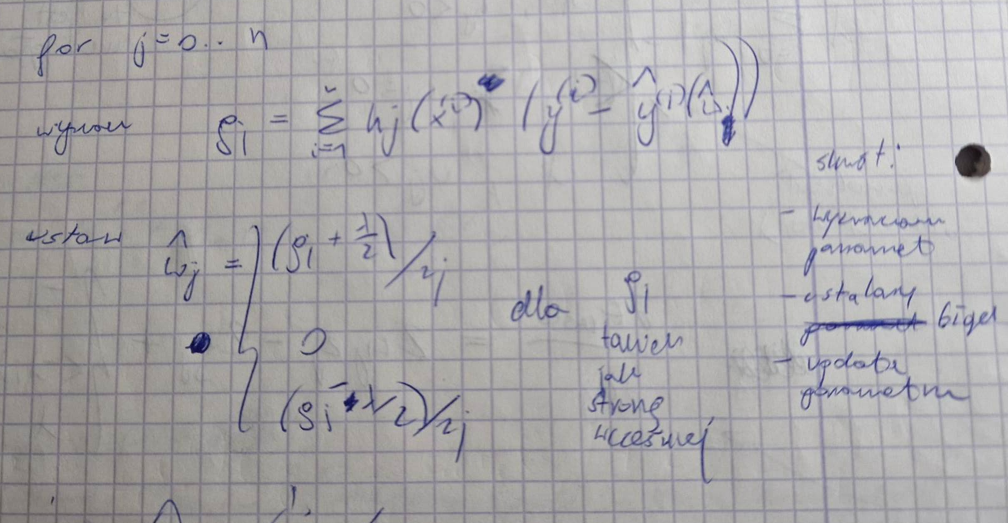

In [ ]:
def get_wj(ro, lamb ,zj):
    if ro < -lamb/2:
        return (ro + lamb/2.)/zj
    elif ro > lamb/2:
        return (ro - lamb/2.)/zj
    else:
        return 0.

In [586]:
for i in range(500):
    ro = []
    for kolumna in domy_int:
        ro.append(sum(domy_int[kolumna] * (ceny - np.dot(domy_int, waga_init))))
    w_j = []
    for indx, jte_ro in enumerate(ro):
        w_j.append(get_wj(jte_ro, 5e2, z[indx]))
    for indx, jte_ro in enumerate(ro):
        waga_init[indx] = get_wj(jte_ro, 5e2, z[indx])

In [587]:
waga_init

array([  0.,   0., -inf, -inf, -inf,   0.,   0., -inf, -inf, -inf,   0.,
       -inf,   0., -inf,  inf, -inf, -inf, -inf, -inf, -inf,   0.])

In [596]:
def lasso(alpha, iterations, data):
    waga_init = np.random.rand(data.shape[1])
    for i in range(iterations):
        ro = []
        for kolumna in data:
            ro.append(sum(data[kolumna] * (ceny - np.dot(data, waga_init))))
        w_j = []
        for indx, jte_ro in enumerate(ro):
            w_j.append(get_wj(jte_ro, alpha, z[indx]))
        for indx, jte_ro in enumerate(ro):
            waga_init[indx] = get_wj(jte_ro, alpha, z[indx])
    return waga_init

In [ ]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = feature_matrix/norms
    return (normalized_features, norms)

In [601]:
domy_int_normalized_numpy_norm, norms = normalize_features(domy_int)
#simple_feature_matrix, norms 

In [613]:
domy_int_columns = domy_int.keys()

In [610]:
coefs_ = lasso(5e2, 500, domy_int_normalized_numpy_norm)

In [616]:
coefs_ = lasso(5e2, 500, domy_int_normalized)

In [617]:
feature_importances_sorted_idx = np.argsort(coefs_)[::-1]

# select the top k features
top_k_features = feature_importances_sorted_idx[:5]
top_k_features

array([ 3, 16,  2,  9, 15], dtype=int64)

In [615]:
domy_int_columns[top_k_features]

Index(['waterfront', 'view', 'floors', 'bathrooms', 'bedrooms'], dtype='object')

In [618]:
domy_int_columns[top_k_features]

Index(['sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_above', 'sqft_living15'], dtype='object')

In [623]:
def get_top_k_columns_names_lasso(dane_do_kolumn ,dane, k, alpha, iters):
    domy_int_columns = dane_do_kolumn.keys()
    coefs_ = lasso(alpha, iters, dane)
    feature_importances_sorted_idx = np.argsort(coefs_)[::-1]
    top_k_features = feature_importances_sorted_idx[:5]
    return domy_int_columns[top_k_features], coefs_

In [633]:
get_top_k_columns_names_lasso(domy_int, domy_int_normalized_numpy_norm, 5, 1100000, 500)

(Index(['waterfront', 'view', 'floors', 'bathrooms', 'bedrooms'], dtype='object'),
 array([   304.23916737,    764.89648451,      0.00078199,      0.00000074,
          1444.56411336, 126011.32166283,   3106.81032726,    298.76967694,
            64.28803949,      0.00101513,      0.00950671,      0.00093913,
             0.00616342,      1.61355013,     -0.24420654,      0.00088841,
             0.00000189,     65.18104637,     44.94985693,     67.79456703,
            51.38921573]))

In [634]:
get_top_k_columns_names_lasso(domy_int, domy_int_normalized, 5, 1100000, 500)

(Index(['sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_above', 'sqft_living15'], dtype='object'),
 array([-1.29592475e+04, -1.07098357e+05, -6.89786449e-02, -1.30139178e-05,
        -1.64704728e+05, -2.34059677e+08, -2.67979571e+06, -8.47868599e+04,
        -1.74070580e+04, -9.95995754e-02, -8.84014735e-01, -2.18587398e-01,
        -2.62306810e+00, -4.21308218e+02, -2.02464034e+01, -1.44617379e-01,
        -4.62514711e-05, -1.66823103e+04, -8.69286924e+03, -1.70512201e+04,
        -3.07024798e+03]))

# PORÓWNAJ Z SKLEARN!!!

    chociaż tu może być różnie bo init wag inny i wgl, nwm czy to korzysta z tych koordynatów descent

In [487]:
pinw = np.linalg.pinv(domy_int_normalized)
model = np.dot(pinw, ceny)
pinw, model

(array([[ 0.00194063, -0.00115537,  0.00267636, ..., -0.00833095,
          0.00064125, -0.00814026],
        [-0.00060399,  0.00008928,  0.00133093, ..., -0.00609001,
          0.00089303, -0.00606395],
        [-0.00003662,  0.00029879, -0.00017938, ..., -0.00076067,
         -0.00010823, -0.0007998 ],
        ...,
        [-0.00036256,  0.00040243,  0.00095652, ..., -0.00071382,
         -0.00090791, -0.00103974],
        [ 0.0018542 ,  0.00109691,  0.00108924, ...,  0.00133848,
          0.00108293,  0.00149708],
        [-0.00052443, -0.00149984, -0.00203224, ...,  0.00804787,
         -0.0009186 ,  0.007923  ]]),
 array([ -135940.10580467,   495971.70978993,  1923120.58840743,
          568630.97391978,   -19566.36700028,   583523.26148451,
          173898.67851525,   138905.86490368,  1151228.56601653,
         2161672.74165877,  1196450.70383203,  -266359.55716532,
           55872.4387001 ,   326577.17415186,   -79568.42875091,
          284264.2439529 ,  -128306.55471274, -2

    normalizacja na całym zbiorze czy na poszczególnych kolumnach?

im większe alpha tym 

In [468]:
from sklearn import linear_model  # using scikit-learn
# 5e2
model_all = linear_model.Lasso(alpha=5e2, normalize=False) # set parameters
model_all.fit(domy_int_normalized, ceny) # learn weights
print(model_all.coef_)

[     -0.          274039.90784963 2706341.71937478       0.
       0.          530765.36581869  215199.84438304  114803.2123274
 1232010.78559003  241864.92471769       0.         -260535.26401941
   46929.75676912  342314.32148664  -63840.26695122  198141.84474183
      -0.         -751484.70611083  -94764.45255901      -0.
       0.        ]


In [472]:
from sklearn import linear_model  # using scikit-learn
# 5e2
model_all = linear_model.Lasso(alpha=5e2, normalize=False) # set parameters
model_all.fit(domy_int, ceny) # learn weights
print(model_all.coef_)

[ -10845.11896493   45213.87840292     464.49084113       0.29365692
      -0.          509818.09679423   47575.04633187   36830.68963954
  102894.10857242    -109.59181968    -125.24561024   -2381.55861672
      29.152223    510116.62055536  -25884.89217315      42.99489509
      -0.19792513 -462425.57554818  -27812.60947856      -0.
      -0.        ]


C:\Users\krukd\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387241407109357.75, tolerance: 291291676192.12976
  model = cd_fast.enet_coordinate_descent(


In [480]:
from sklearn import linear_model  # using scikit-learn
# 5e2
model_all = linear_model.Lasso(alpha=5e2, normalize=True) # set parameters
model_all.fit(domy_int, ceny) # learn weights
print(model_all.coef_)

[     0.              0.            136.56101548      0.
      0.              0.          25272.91505193      0.
  58000.25983236      0.              0.             -0.
      0.         178367.57348944     -0.              0.
     -0.              0.              0.              0.
      0.        ]


In [632]:
from sklearn import linear_model  # using scikit-learn
# 5e2
model_all = linear_model.Lasso(alpha=50, normalize=False) # set parameters
model_all.fit(domy_int_normalized_numpy_norm, ceny) # learn weights
print(model_all.coef_)

[      -0.                0.         69624141.87121505       -0.
        0.          6470193.27421347  8454171.15603734        0.
 24744124.30547689        0.            52421.91865495       -0.
  2737963.12859268        0.               -0.          5212923.6563636
 -1189598.20936057       -0.               -0.                0.
        0.        ]


## Zadanie 7
Zaimplementuj metodę spadku gradientów dla regularyzacji grzebietowej. Zabezpiecz się przed zbyt dużym współczynnikiem uczenia, badając zbieżność w każdym kroku i w razie potrzeby zmniejszając współczynnik uczenia $\sqrt{2}$ razy.

#### było na wykładzie. wystarczy wstawić współczynnik i powinno działać

## Zadanie 8
Dla 5 wybranych w Zadaniu 5 cech dokonaj doboru współczynnika regularyzacji dla metody grzbietowej. 

*Skorzystaj z własnej implementacji regresji z Zadania 7. Zacznij od wysokiego współczynnika uczenia.*

## Zadanie 9
Wytrenuj 5 modeli:
1. Wykorzystujący wszystkie cechy dane w zbiorze.
2. Wykorzystujący wszystkie cechy dane w zbiorze + 5 zaproponowanych.
3. Wykorzystujący 5 cech wybranych regresją krokową w tył.
4. Wykorzystujące tylko cechy wybrane dzięki metodzie Lasso.
5. Wykorzystujące cechy wybrane w metodzie Lasso i poddane regularyzacji grzbietowej dla wybranego współczynnika regularyzacji.

#### trenujemy różne modele każdy model 1 pkt

## Zadanie 10
Dokonaj oceny i porównania modeli z Zadania 9. Wybierz najlepszy model.

#### porównanie na zbiorze testowym. jeżeli się uprę mogę cały uczący. !!!!!w reszcie robić walidację krzyżową